# Requests Module: Working with the Web via HTTP
## Kyle Connolly

![Request's logo](https://avatars2.githubusercontent.com/u/119893?v=3&s=400)

## Table of Contents

1. ['Requests' Module](#What-is-the-Requests-module?)
2. [Getting Started / Installs](#Getting-Started)
3. [Our Objectives](#...So-what-will-we-be-doing-with-Python-+-HTTP-+-Web?)
4. [The Real Action](## Now, let's truly get started)
5. [Explanation of Work](#What-we-have-just-done...)
6. [The Graph](#Our-Graph-of-S&P-500-data)
7. [`POST`-ing Online](#Let's-now-take-our-plotted-graph-and-'post'-it-back-online...)
8. [In Closing...](#Spectrum-of-Abstraction)
9. [Worthwhile Resources](#Further-Reading:)
10. [Sources](#Sources)

# What is the `Requests` module?

It is a 3rd party package (i.e. unavailable from Python's standard library) overseen by [Kenneth Reitz](https://www.kennethreitz.org/); supplying its users a clean, simple, and intuitive API to utilize the `HTTP/1.1` protocol within Python.
## Why choose `Requests` over Python's standard-library `urllib`?
- The Python community's response to `Requests` is emphatic; the simplicity and power is praised by Pythonistas
- The Python Software Foundation [documentation](https://docs.python.org/2/library/urllib.html#module-urllib) actually recommends using `Requests` for `HTTP` related work over its standard library module. That's one noteable and worthy testimonial.
- `Requests` actually embeds `urllib` within it; to use `Requests` is to also use `urllib`.

## ...So what is the `HTTP` protocol?

`HTTP`, short for HyperText Transfer Protocol, is an agreed upon methodology for **servers** and **clients** (or any multiple of networked machines) to find, retrieve, modify, and contribute *resources* to one another. Development of the protocol is spearheaded by Roy Fielding, `HTTP` is virtually the sole protocol used by the Web to allocate webpages and related data between servers and web browsers. Without a protocol like `HTTP`, the Web is analogous to a car that doesn't run.

### ...So what will we be doing with `Python + HTTP + Web`?

- Accessing and grabbing data from Webpages
- Working with our captured data in a Python program 
- Sending our findings back up to the Web

# Getting Started

Becuase `Requests` is a third-party package, we must install it for Python's disposal. With a few means of acheiving this, our easiest is to leverage the `pip` command. We'll also need `BeautifulSoup` from `bs4` so in a shell instance, type the following:
```bash
$ sudo pip install requests
```

```bash
$ sudo pip install bs4
```
## After installation, we simply `import` the Python module like any other, like we would with `sys` for example.


In [1]:
from bs4 import BeautifulSoup
import requests as req

Now we have access to all that `Requests` promises to deliver...<br>Let's do a quick connectivity test via  `HTTP`'s `GET` method by way of `Requests`:

In [2]:
r = req.get('http://google.ca')
print(r)

<Response [200]>


the output of `<Response [200]>` is an `HTTP response status code`.  `200` is the code which indicates all seems to be functioning and connecting as expected.

## Now, let's truly get started

In [3]:
# Google's webpage of market quotes for the S&P500 over the last month
webpage = req.get('https://www.google.com/finance/historical?q=INDEXSP%3A.INX&ei=R1PWWLmNLYHj2AblkoG4Ag')

# Preliminary test of our success using the GET method
webpage.status_code

# Parse the data from our GET call and sift through to desired data-points 
soup = BeautifulSoup(webpage.text, 'html.parser')
   
dates = [td.text[0:6].strip(',') for td in soup.find_all('td', 'lm')]
quotes = [td.text[0:8].strip(',') for tr in soup.find_all('tr', 'bb') for td in tr.find_all('td', 'rgt')]
closing_quotes = quotes[3::5]


## What we have just done...

According to the `Requests` [documentation](http://docs.python-requests.org/en/master/user/advanced/#request-and-response-objects):

>Whenever a call is made to `requests.get()` and [other `HTTP` methods], [we] are doing two major things. First, [we] are constructing a `Request object` which will be sent off to a server to request or query some `resource`. Second, a `Response object` is generated once Requests gets a response back from the server. The Response object contains all of the information returned by the server and also contains the Request object [we] created originally.

Using `Requests` as `req` we pulled down the webpage `resource` in its entirety with the `HTTP GET` method as `webpage` - of Google's S&P 500 Index quotes from the last month.

--------

After pulling down the page, we needed to use another 3rd party package, `BeautifulSoup`, to parse through the `html` document that is `webpage` in our Python script. For simplicity sake, we will not explicityly cover `BeautifulSoup`; however we will say its use is to boil down elements within the `DOM` into data we can use within `Python`. In our case, `dates` equals the first six characters for every `td` on the webpage with the class `lm`; we can `inspect element` in our browser to determine the relevant criteria for boiling down to elements of interest. Next, `prices` equals the first eight characters for every `td` of class `rgt` within the rows of `tr` of class `bb`. Again, `inspect element` is our Sherlock Holmes, this produces 150 quotes; 5 for each market day.<br>
We wanted to hone in on the index's closing quote for each day, so `closing_quotes` contains a list of each market day's fourth quote: beginning on the fourth element of `quotes` and returning every fith item in the list.

----

Now, we have two `lists` of workable data; `dates` & `quotes`. `dates` contains the 3-letter prefix and number of a given open-market day, `closing_quotes` is the specific quote for the S&P upon that market day's closing. To plot `closing_quotes`, we have to remove the comma from the `string` values inorder to cast them to `floats`. <br>
we will now plot them using `matplotlib`:

# Our Graph of S&P 500 data

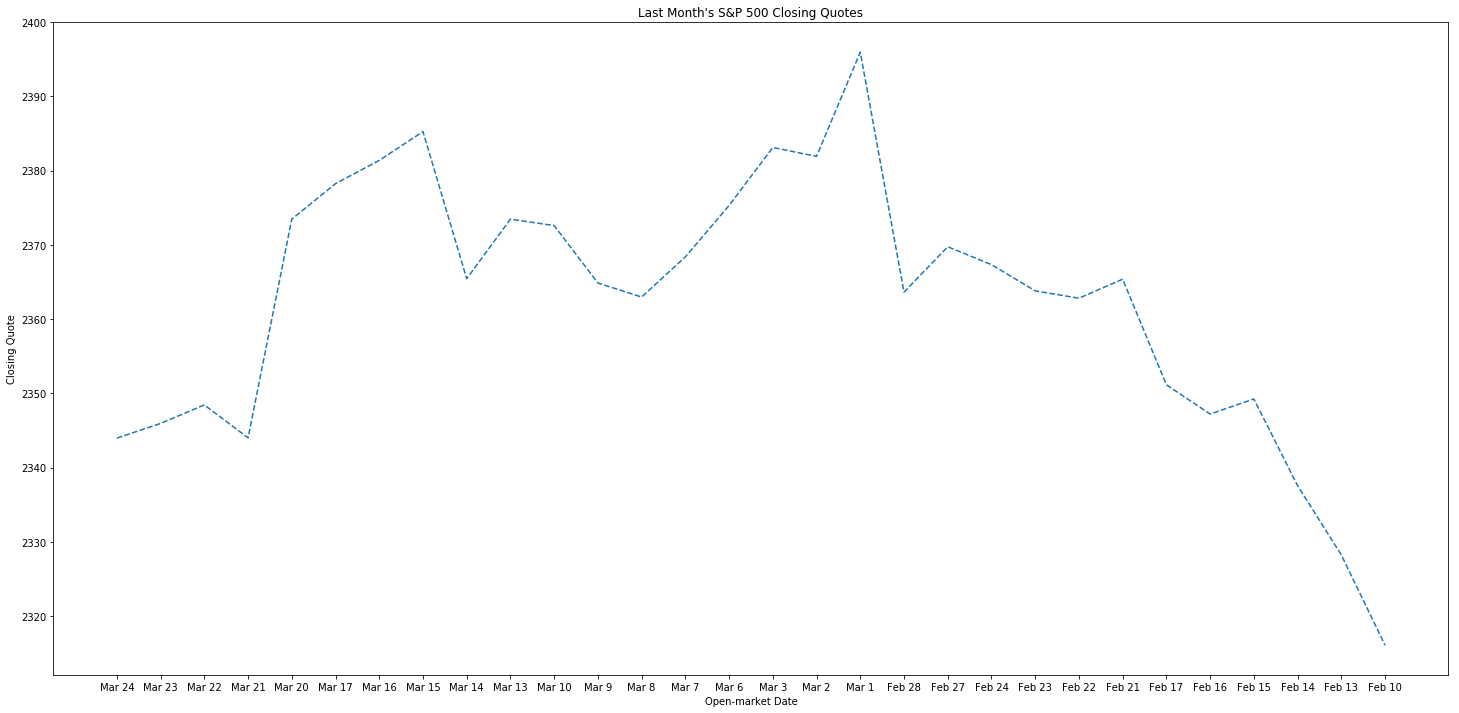

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

x_labels = dates
x = [n for n in range(0,len(x_labels))]
y = [float(quote.replace(',','')) for quote in closing_quotes]
plt.figure(figsize=(25, 12))
plt.plot(x,y,'--')
plt.xticks(x, x_labels)
plt.title("Last Month's S&P 500 Closing Quotes")
plt.xlabel('Open-market Date')
plt.ylabel('Closing Quote')

plt.show()

## Let's now take our plotted graph and '*post*' it back online...

In [5]:
url = 'http://httpbin.org/post'
image = {'graph.png': open('graph.png', 'rb')}

wire_graph_to_the_web = req.post(url, files=image)

 our '`wire_graph_to_the_web`' object represents the `POST` method call using `Requests`. Using the `HTTP` status codes, we can again determine our level of success. We can also get relevant info about the request by accessing `wire_graph_to_the_web`'s `header`:

In [6]:
# The code relating to our POST request
print(wire_graph_to_the_web.status_code)

# High-level Information of our HTTP POST request
print(wire_graph_to_the_web.headers)

200
{'Connection': 'keep-alive', 'Server': 'gunicorn/19.7.1', 'Date': 'Sun, 26 Mar 2017 13:52:25 GMT', 'Content-Type': 'application/json', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true', 'Content-Length': '65326', 'Via': '1.1 vegur'}


A response of `200` means we've successfully submitted our S&P 500 graph to the web (httpbin is a quick and simple service; while the `POST` request is successful the image isn't actually *hosted*)



#### There is so much more...

to `Requests` and `BeautifulSoup` and the `HTTP protocol`. I have barely scratched the surface and what lies beyond is currently outside my grasp of understanding. While I tend to believe 'basic is better', preferring to abstract away as little from the work being done; the `Requests` module has hit a sweet spot of abstraction for me. It has smoothed the use of `HTTP` without eliminating the need to properly understand the protocol and other pieces of technology it leverages.<br>

----------
### Spectrum of Abstraction
On this idea of abstraction, I'd like to leave you now, dear reader, with a YouTube video on the subject...<br><br>
[![On The Spectrum of Abstraction](https://i.ytimg.com/vi/mVVNJKv9esE/maxresdefault.jpg)](https://youtu.be/mVVNJKv9esE)

Thanks,

Kyle

##### Further Reading:
- [R. Fielding Ph.D Dissertation](http://www.ics.uci.edu/~fielding/pubs/dissertation/fielding_dissertation.pdf)
- [HTTP/1.1 RFC 2616](http://web.archive.org/web/20130117075349/http://www.ietf.org/rfc/rfc2616.txt)
- [bs4's BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Hitchiker's Guide to Python](http://docs.python-guide.org/en/latest/)

###### Sources
- [Requests:HTTP for Humans(Documentation)](http://docs.python-requests.org/en/master/)
- [PSF: Recommending Requests over std-lib 'urllib'](https://docs.python.org/2/library/urllib.html#module-urllib)
- [BeautifulSoup(Documentation)](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Web Scraping Reference](https://blog.hartleybrody.com/web-scraping-cheat-sheet/#using-beautifulsoup)